___
# Projeto 3 - CD
___

## Regressão linear que agrupa diferentes tipos de músicas de acordo com sua dançabilidade.

O objetivo desse projeto é fazer diferentes agrupamentos de músicas do Spotify, utilizando a regressão linear, levando em consideração o quão dançável é a música. Queremos analisar o tamanho obtido e as diferenças das quantidades de músicas em determinados grupos.

Exemplo de aplicação da técnica: https://www.kaggle.com/noemir/dimension-reduction-of-music-pref-in-progress/comments 

**Nomes das integrantes:**
Rebeca Moreno,
Giulia Passarelli e
Carla Kim

In [34]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import expon
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

In [35]:
#lendo a planilha de dados
sptdata = pd.read_csv("data.csv")

#ajustando a quantidade de termos que precisamos usar
spotdata = sptdata[0:100]
spotdatatreina = sptdata[100:200]

Dicionário dos dados:
https://developer.spotify.com/web-api/get-audio-features/

C:\Users\Carla Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Carla Kim\Anaconda3\lib\site-packages\pandas\core\generic.py:5088: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Carla Kim\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Carla Kim\Anacond

Frequências relativas por notas musicais:
C         10.0
C♯, D♭    16.0
D         13.0
D♯, E♭     2.0
E          3.0
F          8.0
F♯, G♭     5.0
G          9.0
G♯, A♭     5.0
A         10.0
A♯, B♭    10.0
B          9.0
Name: key, dtype: float64 



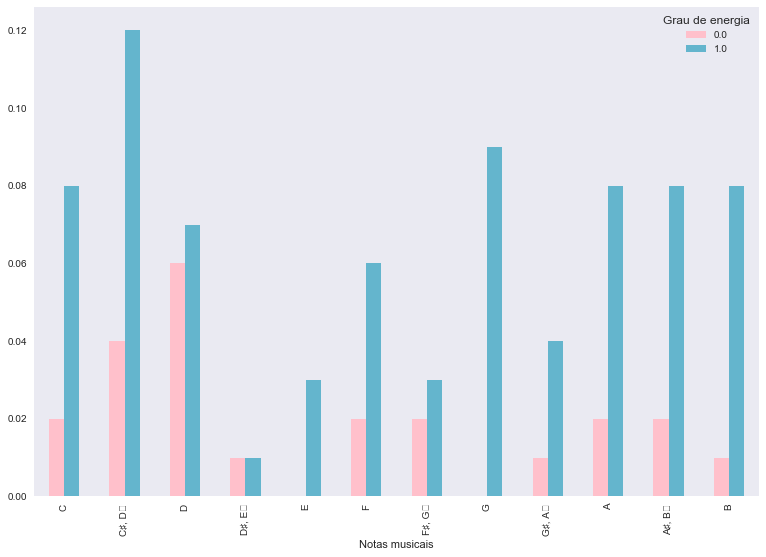

In [75]:
spotdata.notakey = spotdata.key
spotdata.notakey = spotdata.notakey.astype('category')
spotdata.notakey.cat.categories = (['C','C♯, D♭','D','D♯, E♭','E','F','F♯, G♭','G','G♯, A♭','A','A♯, B♭','B'])

#filtrando/dividindo os Estados por Regiões:
spotdata.energyy = spotdata.energy
spotdata.energyy[(spotdata.energyy >= 0) & (spotdata.energyy < 0.5)] = [0]
spotdata.energyy[(spotdata.energyy >= 0.5) & (spotdata.energyy < 1)] = [1]
#spotdata.energyy = spotdata.energyy.astype('category')
#spotdata.energyy.cat.categories = (['Menos energética','Mais energética'])

print('Frequências relativas por notas musicais:')
ut1 = (spotdata.notakey.value_counts(normalize=True)*100).round(decimals=1).reindex(['C','C♯, D♭','D','D♯, E♭','E','F','F♯, G♭','G','G♯, A♭','A','A♯, B♭','B'])
print(ut1,'\n')

#tabela de frequência das notas (key)
NotaEnergy = pd.crosstab(spotdata.notakey,spotdata.energyy, normalize=True, colnames=['Grau de energia'],rownames=['Notas musicais'])
NotaEnergy.plot(kind = 'bar',title = '',figsize=(13,9),color = ('pink','c','purple'),grid=False)

C:\Users\Carla Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Carla Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Carla Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

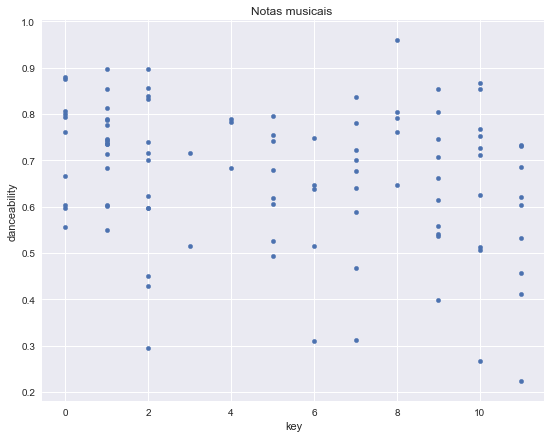

Grau de energia,0,1,2,3,4,5,6,7,8,9,10,11,All
Notas musicais,,,,,,,,,,,,,
0,0.02,0.05,0.01,0.01,0.03,0.06,0.01,0.01,0.01,0.05,0.07,0.07,0.4
1,0.08,0.11,0.12,0.01,0.00,0.02,0.04,0.08,0.04,0.05,0.03,0.02,0.6
All,0.10,0.16,0.13,0.02,0.03,0.08,0.05,0.09,0.05,0.10,0.10,0.09,1.0


In [76]:
#para o treinamento do computador dos 100 primeiros termos
spotdata['mode12key'] = spotdata['mode']*12 + spotdata['key']
# for i in spotdata['mode12key']:
#     if i>=12:
#         print('tom maior')
#         if 
spotdata['mode12key'] = np.where(spotdata.mode12key >= spotdata['mode12key'].mean(), 1, 0)

#para o teste dos novos termos de 100 a 200
spotdata['mode12keytreina'] = spotdatatreina['mode']*12 + spotdatatreina['key']
spotdata['mode12keytreina'] = np.where(spotdata.mode12keytreina >= spotdata['mode12keytreina'].mean(), 1, 0)

#plot do gráfico 
spotdata.plot(kind = "scatter", x = "key", y = "danceability",figsize=(9,7))
plt.title('Notas musicais ')
plt.show()

pd.crosstab(spotdata['mode'],spotdata.key,margins=True,normalize=True, colnames=['Grau de energia'],rownames=['Notas musicais'])

## **Part 2:** Predicting a Categorical Response

In [77]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['danceability']
X = spotdata[feature_cols]
y = spotdata.mode12key
logreg.fit(X, y)
spotdata['mode12key_pred_class'] = logreg.predict(X)

C:\Users\Carla Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [78]:
pd.crosstab(spotdata.notakey,spotdata['danceability'], colnames=['Notas musicais'])
spotdata['danceability'].describe()

count    100.00000
mean       0.66918
std        0.15105
min        0.22400
25%        0.59675
50%        0.70300
75%        0.78125
max        0.95900
Name: danceability, dtype: float64

In [79]:
spotdata['mode12key_pred_prob'] = logreg.predict_proba(X)[:, 1]

C:\Users\Carla Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


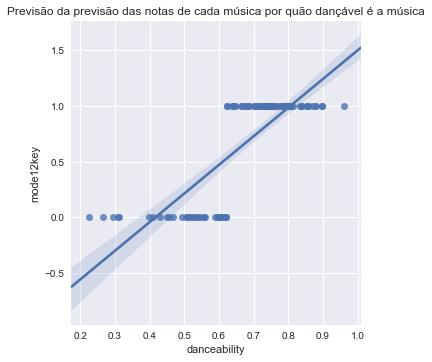

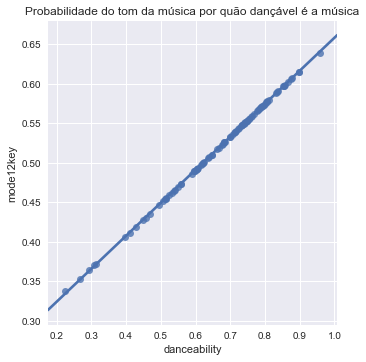

In [80]:
sns.lmplot('danceability','mode12key_pred_class',spotdata)
plt.title('Previsão da previsão das notas de cada música por quão dançável é a música')
plt.xlabel('danceability')
plt.ylabel('mode12key')

sns.lmplot(x = 'danceability', y='mode12key_pred_prob', data=spotdata)
plt.title('Probabilidade do tom da música por quão dançável é a música')
plt.xlabel('danceability')
plt.ylabel('mode12key')

O gráfico de probabilidade nos diz que, para uma dançabilidade menor, a chance de a música ter um tom menor e ter as notas iniciais (mais próximas de dó (key 0 = C)) é maior que a outra chance.

In [81]:
# examine some example predictions

print(logreg.predict_proba(0.2))

[[ 0.67173525  0.32826475]]


# Parte do rascunho que vcs devem ver

peguei desse site: https://seaborn.pydata.org/generated/seaborn.lmplot.html

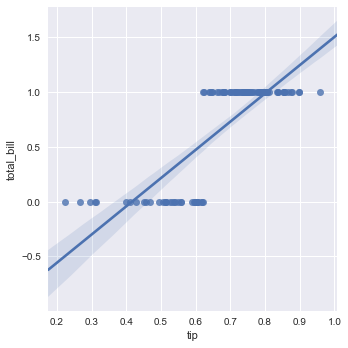

In [82]:
import seaborn as sns; sns.set(color_codes=True)
tips = sns.load_dataset("tips")
tips.total_bill = spotdata.mode12key_pred_class
tips['total_bill_prob'] = spotdata.mode12key_pred_prob
tips.tip = spotdata.danceability
tips.smoker = spotdata.notakey
tips['key'] = spotdata.key
tips['energy'] = spotdata.energy


#print(tips)

#grafico dos dois grupos separados pela regressão logística feita
g = sns.lmplot(x='tip', y='total_bill', data=tips)

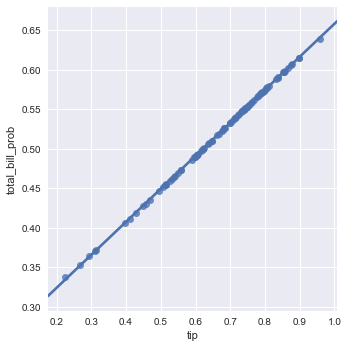

In [83]:
#grafico da probabilidade direto da classe de cima (tom maior)
g = sns.lmplot(x='tip', y='total_bill_prob', data=tips)

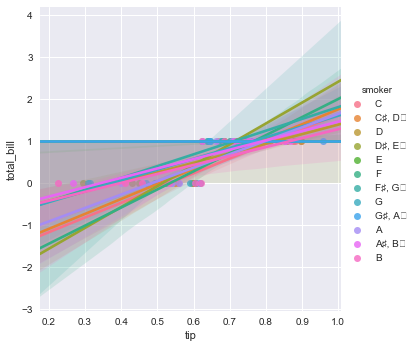

In [84]:
g = sns.lmplot(x="tip", y="total_bill", hue="smoker", data=tips)

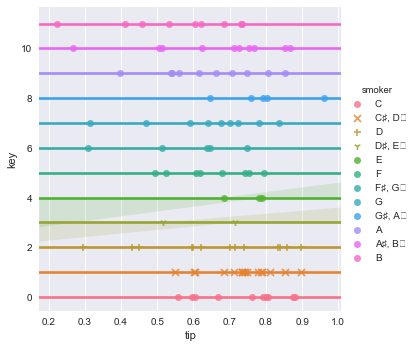

In [85]:
#gráfico de notas por danceability
g = sns.lmplot(x="tip", y="key", hue="smoker", data=tips,markers = ["o","x","+","1","o","o","o","o","o","o","o","o"])
#cada ponto mostra o grau de dancabilidade

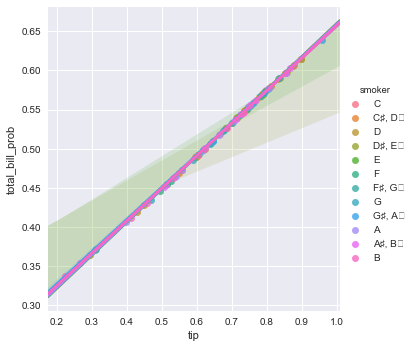

In [86]:
g = sns.lmplot(x='tip', y='total_bill_prob', hue="smoker", data=tips)

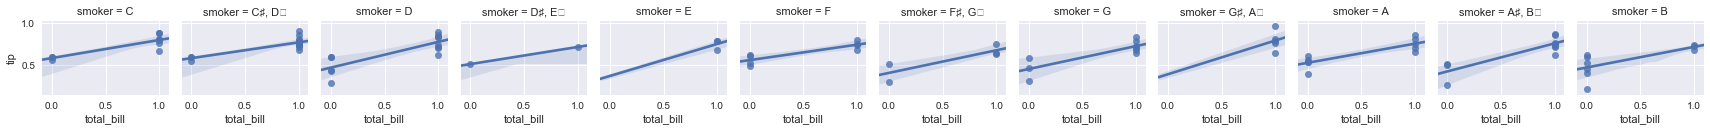

In [87]:
g = sns.lmplot(x="total_bill", y="tip", col="smoker", data=tips,size=2)

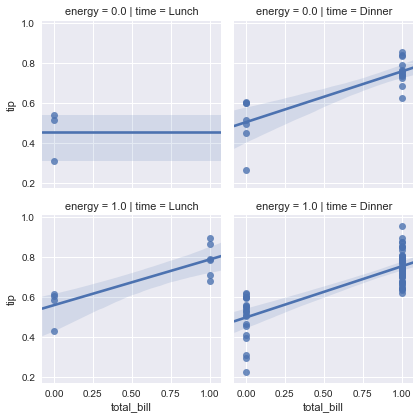

In [88]:
g = sns.lmplot(x="total_bill", y="tip", row="energy", col="time",data=tips, size=3)

In [89]:
g = (g.set_axis_labels("Total bill (US Dollars)", "Tip").set(xlim=(0, 60), ylim=(0, 12),xticks=[10, 30, 50], yticks=[2, 6, 10]).fig.subplots_adjust(wspace=.02))

In [90]:
g

In [196]:
dummy_ranks = pd.get_dummies(spotdata['energy'], prefix='energy')
print (dummy_ranks.head())
#trasnformar energy em binarios, ou seja, eh energetico ou nao

   energy_0.0  energy_1.0
0           1           0
1           1           0
2           1           0
3           1           0
4           0           1


In [198]:
cols_to_keep = ['mode','danceability', 'mode12key']
dataff = spotdata[cols_to_keep].join(dummy_ranks.ix[:, 'energy_0':])
print (dataff.head())
#ordenando as informaoes, com o MODE, tom, como a variavel que queremos descobrir

   mode  danceability  mode12key  energy_0.0  energy_1.0
0     1         0.833          1           1           0
1     1         0.743          1           1           0
2     1         0.838          1           1           0
3     1         0.494          1           1           0
4     0         0.678          0           0           1


In [199]:
dataff['intercept'] = 1.0

In [200]:
import statsmodels.api as sm
train_colss = dataff.columns[1:]
logitt = sm.Logit(dataff['mode'], dataff[train_colss])
resultt = logitt.fit()

         Current function value: 0.193012
         Iterations: 35


C:\Users\Carla Kim\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [201]:
print (resultt.summary())

                           Logit Regression Results                           
Dep. Variable:                   mode   No. Observations:                  100
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            3
Date:                Mon, 20 Nov 2017   Pseudo R-squ.:                  0.7132
Time:                        20:01:03   Log-Likelihood:                -19.301
converged:                      False   LL-Null:                       -67.301
                                        LLR p-value:                 1.126e-20
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
danceability     7.0529      3.913      1.803      0.071      -0.616      14.722
mode12key       33.6609   8.85e+05    3.8e-05      1.000   -1.73e+06    1.74e+06
energy_0.0      -1.5801    6.6e+07  -2.39e-0

In [202]:
print (resultt.conf_int())

                         0             1
danceability -6.158839e-01  1.472168e+01
mode12key    -1.734998e+06  1.735065e+06
energy_0.0   -1.293190e+08  1.293190e+08
energy_1.0   -1.293190e+08  1.293190e+08
intercept    -1.293190e+08  1.293190e+08


In [203]:
print (np.exp(resultt.params))
#oddsratio

danceability    1.156204e+03
mode12key       4.156505e+14
energy_0.0      2.059485e-01
energy_1.0      7.795694e-02
intercept       1.605510e-02
dtype: float64


In [204]:
paramss = resultt.params
conff = resultt.conf_int()
conff['OR'] = paramss
conff.columns = ['2.5%', '97.5%', 'OR']
print (np.exp(conff))

                  2.5%         97.5%            OR
danceability  0.540163  2.474820e+06  1.156204e+03
mode12key     0.000000           inf  4.156505e+14
energy_0.0    0.000000           inf  2.059485e-01
energy_1.0    0.000000           inf  7.795694e-02
intercept     0.000000           inf  1.605510e-02


C:\Users\Carla Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


In [192]:
#spotdata['energy']

In [193]:
#spotdata['mode']

In [194]:
#spotdata['mode12key']

In [195]:
#spotdata['mode12key_pred_prob']

0     0.588632
1     0.551210
2     0.590685
3     0.445949
4     0.523792
5     0.576664
6     0.549530
7     0.353423
8     0.491987
9     0.589864
10    0.458982
11    0.555405
12    0.491987
13    0.559173
14    0.517014
15    0.506413
16    0.491987
17    0.570437
18    0.538584
19    0.547849
20    0.597234
21    0.552889
22    0.597234
23    0.337309
24    0.453509
25    0.567106
26    0.411462
27    0.510230
28    0.567523
29    0.547849
        ...   
70    0.577906
71    0.489018
72    0.525908
73    0.561682
74    0.450986
75    0.430490
76    0.435073
77    0.464044
78    0.454771
79    0.418879
80    0.571268
81    0.537740
82    0.525908
83    0.370273
84    0.602530
85    0.498775
86    0.615060
87    0.486050
88    0.493260
89    0.569189
90    0.547428
91    0.579975
92    0.606182
93    0.491139
94    0.553308
95    0.497078
96    0.574590
97    0.406129
98    0.526754
99    0.535630
Name: mode12key_pred_prob, Length: 100, dtype: float64